<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Population-Regression-Line" data-toc-modified-id="Population-Regression-Line-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Population Regression Line</a></span><ul class="toc-item"><li><span><a href="#Simulate-error-term" data-toc-modified-id="Simulate-error-term-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simulate error term</a></span></li><li><span><a href="#Simulate-X-values" data-toc-modified-id="Simulate-X-values-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Simulate X values</a></span></li><li><span><a href="#Generate-Y-values-and-plot-the-population-regression-line" data-toc-modified-id="Generate-Y-values-and-plot-the-population-regression-line-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Generate Y values and plot the population regression line</a></span></li></ul></li><li><span><a href="#Build-a-least-squares-line-using-the-above-dataset" data-toc-modified-id="Build-a-least-squares-line-using-the-above-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Build a least squares line using the above dataset</a></span></li><li><span><a href="#Plotting-RSS--Residual-Sum-of-Squares" data-toc-modified-id="Plotting-RSS--Residual-Sum-of-Squares-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plotting RSS- Residual Sum of Squares</a></span></li><li><span><a href="#Points-of-observation" data-toc-modified-id="Points-of-observation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Points of observation</a></span><ul class="toc-item"><li><span><a href="#Learning-point-from-section-2" data-toc-modified-id="Learning-point-from-section-2-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Learning point from section 2</a></span></li><li><span><a href="#Learning-point-from-section-3" data-toc-modified-id="Learning-point-from-section-3-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Learning point from section 3</a></span></li></ul></li><li><span><a href="#Building-Least-Squares-Line-using-multiple-samples" data-toc-modified-id="Building-Least-Squares-Line-using-multiple-samples-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Building Least Squares Line using multiple samples</a></span></li></ul></div>

In [85]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
np.random.seed(222)

## Population Regression Line

Population Regression line is best linear approximation of the true linear relationship between X and Y.

Let us assume the relationship between 2 linearly dependent variables  is defined by Y = a + b*X + E. Where E is the randon error term.

### Simulate error term

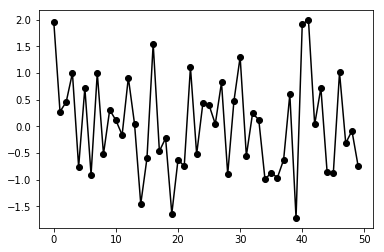

In [86]:
sample_size = 50
E = np.random.standard_normal(size = sample_size)
plt.plot(E, '-ok')

In [87]:
np.mean(E)

0.02873747928161554

### Simulate X values

In [88]:
X = np.random.ranf(sample_size)*2
X

array([0.80050234, 1.94131461, 0.60703867, 0.31438043, 1.28289851,
       0.09177072, 1.46716345, 0.55048183, 1.98575557, 1.33868688,
       1.6490644 , 0.56768856, 1.20306074, 1.88489493, 0.45599833,
       0.40654015, 0.02369629, 1.91302477, 0.8790533 , 0.8946265 ,
       1.86723107, 0.88924962, 0.44316334, 1.74280263, 0.07688688,
       1.82431411, 0.32706585, 1.35899129, 0.2463555 , 0.74285363,
       1.16557534, 1.4009235 , 1.05274132, 1.19497859, 1.48811697,
       1.83467414, 0.54814389, 0.59256517, 0.26999342, 0.49240536,
       1.02349461, 1.97754546, 1.11105672, 1.62377471, 1.63850663,
       0.89994755, 1.99230008, 0.69906629, 1.76380812, 1.80859455])

### Generate Y values and plot the population regression line

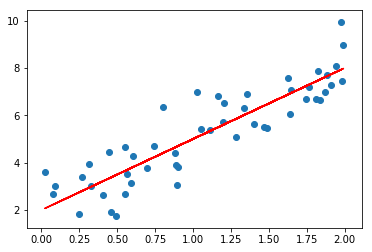

In [89]:
a = 2
b = 3 
Y = a + b*X + E #this is our model
plt.plot(X, (a + b*X), '-r')
plt.scatter(X, Y)

## Build a least squares line using the above dataset

In [90]:
regr = linear_model.LinearRegression()
X_org = X.copy()
X = X.reshape(-1, 1)
regr.fit(X, Y)
y_hat = regr.predict(X)
residuals = Y - y_hat

In [91]:
b_hat = regr.coef_[0]
a_hat = regr.intercept_
print(b_hat, a_hat)

2.898433110471366 2.1391503722217706


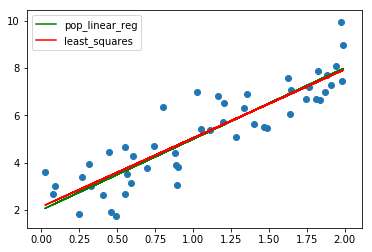

In [92]:
plt.plot(X_org, (a + b*X_org), '-g',label ='pop_linear_reg')
plt.scatter(X_org, Y)
plt.plot(X_org, (a_hat + b_hat*X_org), '-r', label = 'least_squares')
plt.legend(loc='upper left')

In [93]:
X_org

array([0.80050234, 1.94131461, 0.60703867, 0.31438043, 1.28289851,
       0.09177072, 1.46716345, 0.55048183, 1.98575557, 1.33868688,
       1.6490644 , 0.56768856, 1.20306074, 1.88489493, 0.45599833,
       0.40654015, 0.02369629, 1.91302477, 0.8790533 , 0.8946265 ,
       1.86723107, 0.88924962, 0.44316334, 1.74280263, 0.07688688,
       1.82431411, 0.32706585, 1.35899129, 0.2463555 , 0.74285363,
       1.16557534, 1.4009235 , 1.05274132, 1.19497859, 1.48811697,
       1.83467414, 0.54814389, 0.59256517, 0.26999342, 0.49240536,
       1.02349461, 1.97754546, 1.11105672, 1.62377471, 1.63850663,
       0.89994755, 1.99230008, 0.69906629, 1.76380812, 1.80859455])

-5.506706202140776e-16


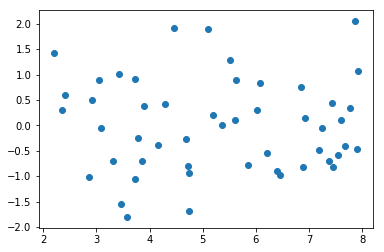

In [94]:
plt.scatter(y_hat, residuals)
print(np.mean(residuals))

In [95]:
#rss_model = np.sum(np.square(Y - y_hat))
rss_model = np.sum(np.square(Y - (a_hat + b_hat*X_org)))

## Plotting RSS- Residual Sum of Squares

Now for different values of a_hat and b_hat let us visualize the RSS distribution and see if our linear regression model we built above actually calculated a_hat and b_hat which would minimize the RSS

For this we have calculated RSS for multiple values of a_hat and b_hat and plotted the RSS using the same data we generated in section 1 above.

Model Parameters 2.1391503722217706 2.898433110471366
Parameter having min RSS using simulated data 2.08952 2.94
RSS from the simulation and the model are: 41.34812032291133 and 41.315580347649075


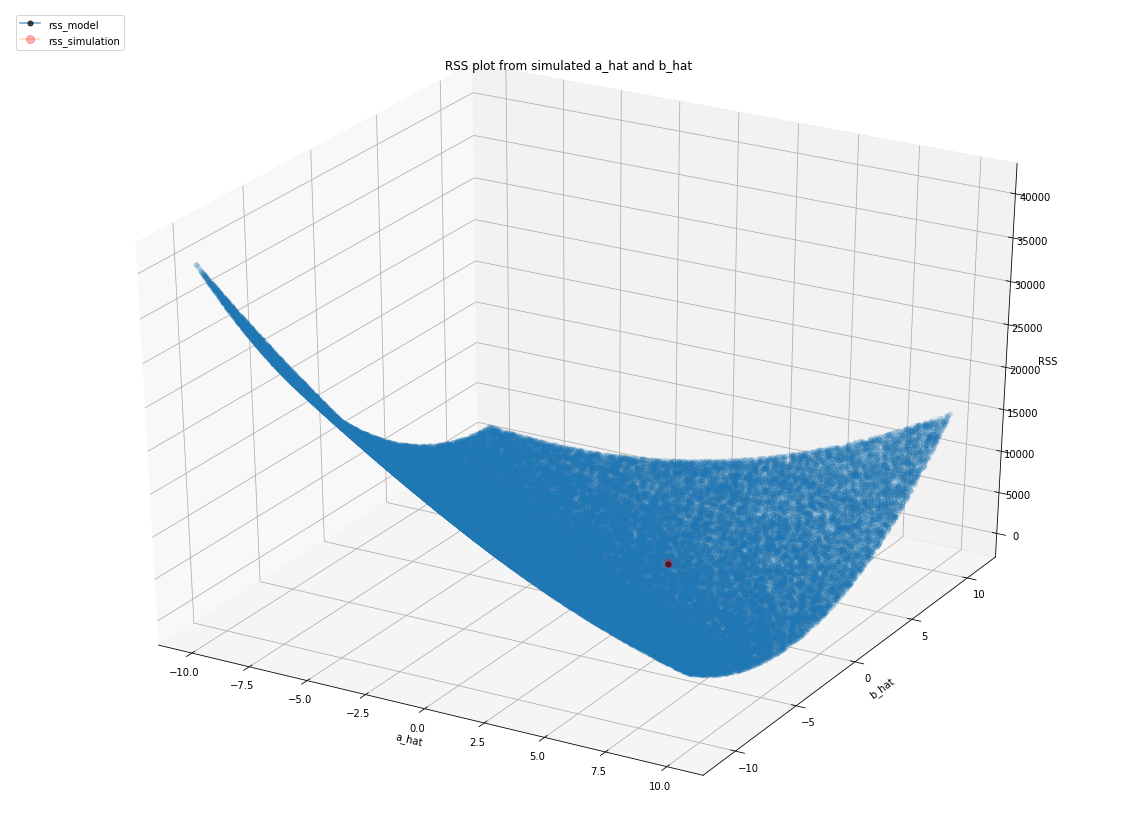

In [96]:
rss_master = []
samples = 100000
a_hat_space = np.round(np.linspace(-10,10,samples),5)
b_hat_space = np.round(np.linspace(-11,11,samples),5)
np.random.shuffle(a_hat_space)
np.random.shuffle(b_hat_space)
coeffs = zip(a_hat_space, b_hat_space)
rss_min = 0.0
a_hat_min = np.nan
b_hat_min = np.nan
for _a, _b in coeffs:
    rss = np.sum(np.square(Y - (_a + _b*X_org)))
    if rss_min == 0.0:
        a_hat_min = _a
        b_hat_min = _b
        rss_min = rss
    elif rss < rss_min:
        a_hat_min = _a
        b_hat_min = _b
        rss_min = rss
    rss_master = np.append(rss_master, rss)

#plotting code
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

Axes3D.scatter(ax, xs = a_hat_space, ys = b_hat_space, zs = rss_master, alpha =0.1)
ax.plot([a_hat], [b_hat], [rss_model], markerfacecolor='k', markeredgecolor='k', marker='o',\
        markersize=5, alpha=0.7, label="rss_model")
ax.plot([a_hat_min], [b_hat_min], [rss_min], markerfacecolor='r', markeredgecolor='r', marker='o',\
        markersize=8, alpha=0.3, label = 'rss_simulation')
print("Model Parameters", a_hat, b_hat)
print("Parameter having min RSS using simulated data", a_hat_min, b_hat_min)
ax.set_title("RSS plot from simulated a_hat and b_hat")
ax.set_xlabel("a_hat")
ax.set_ylabel("b_hat")
ax.set_zlabel("RSS")
plt.legend(loc='upper left')
print("RSS from the simulation and the model are: {} and {}".format(rss_min, rss_model))

## Points of observation
### Learning point from section 2
1. Even though we are using the data generated by the population regression line, our least squares line is not the same as the population regression line because we are using only one sample of data to estimate the coefficients.
2. Also remember that the least squares line is generated by using the observed data.
2. If we use multiple samples from the model(section 1.3) and generate the coefficients and take the mean of those coefficients then our coefficient estimates would be very very close to the population parameters
3. This process is analogus to the concept of estimating the population mean from sample mean based on the concept of bias.
4. What is the concept of bias? 
    
    Using one sample parameter like mean to estimate the population parameter is an unbiased estimate. **On an average** this estimate is equal to the population parameter. This means that on the basis of just one estimate we either over or underestimate the population parameter but, if we take multiple samples and calculate multiple sample parameter and then take an average of them, the resulting estimate would be very very close to the population parameter, which in our case are the a_hat and b_hat values. 
Let us see this in an example from section 5

### Learning point from section 3
1. The Least Squares model generated a_hat and b_hat such that it minimizes RSS, we can clearly see how these values represent the min RSS when we compare the red dot vs black dot in the graph. They over lap each other.
2. If we try the same simulation with a different seed then we make not be able to generate the aspired a_hat and b_hat in the simulation, try changing the seed and see what happens


## Building Least Squares Line using multiple samples

Sample  0 2.0499339719300003 2.855086343633538
Sample  1 2.7904093141252644 1.9656905558337072
Sample  2 1.6197377008392273 3.528083067263212
Sample  3 1.8743049219972203 2.9652949985326185
Sample  4 2.4321636739078665 2.751548653279484
Sample  5 1.6277917310372154 3.1411324699065095
Sample  6 1.721372338712698 3.387264754559456
Sample  7 2.2172458577330154 2.969188955266361
Sample  8 2.3301631632313446 2.8962677756751907
Sample  9 1.839039722243688 3.349231497493391
Sample  10 1.9010294633299663 3.151298085219087
Sample  11 2.3325616160075238 2.570584605780068
Sample  12 2.1466584610528145 2.8932784156353133
Sample  13 1.933464598388952 2.9917426783796524
Sample  14 1.9847985463076752 3.063460361695173
Sample  15 2.4685779048263417 2.714063137890277
Sample  16 2.317265693337512 2.8808517310713224
Sample  17 1.8629199029851224 3.064451801628216
Sample  18 2.0121478558792214 2.795448419890914
Sample  19 1.7021432627586401 3.1233041991640955
a_hat and b_hat estimates using multiple sampl

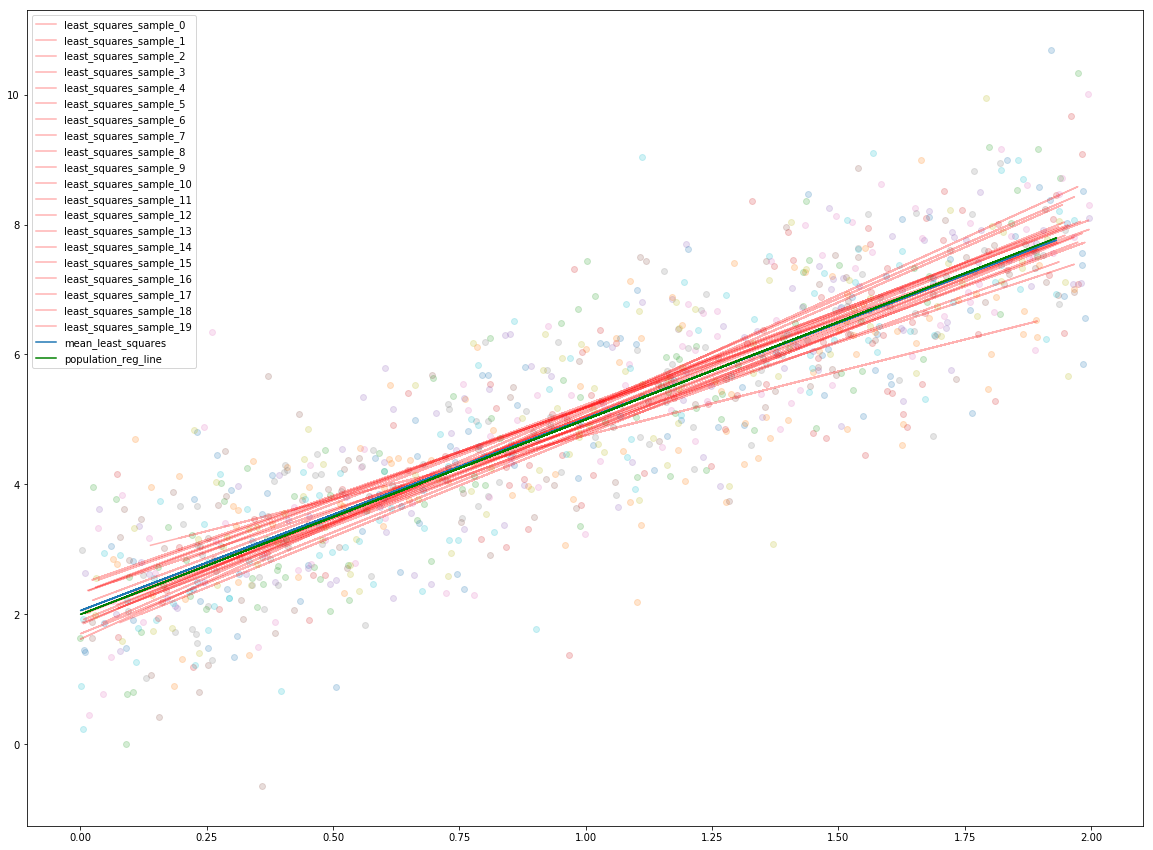

In [97]:
number_of_samples = 20
sample_size = 50
a_list = []
b_list = []
plt.figure(figsize=(20,15))

for sample in range(number_of_samples):
    #Simulate random error
    E = np.random.standard_normal(size = sample_size)
    #Simulate X data
    X = np.random.ranf(sample_size)*2
    #Calculate Y using X and E
    Y = a + b*X + E
    #build least squares line
    regr = linear_model.LinearRegression()
    X = X.reshape(-1, 1)
    regr.fit(X, Y)
    b_hat = regr.coef_[0]
    a_hat = regr.intercept_
    #storing regression results
    print("Sample ",sample, a_hat, b_hat)
    a_list.append(a_hat)
    b_list.append(b_hat)
    #plotting code
    plt.scatter(X, Y, alpha=0.2)
    plt.plot(X, (a_hat + b_hat*X), '-r', label = 'least_squares_sample_'+str(sample), alpha=0.3)

a_hat_mean = np.mean(a_list)
b_hat_mean = np.mean(b_list)
print("a_hat and b_hat estimates using multiple samples ",a_hat_mean, b_hat_mean)
plt.plot(X, (a_hat_mean + b_hat_mean*X), label = 'mean_least_squares')
plt.plot(X, (a + b*X), '-g',label ='population_reg_line')
plt.legend(loc='upper left')